Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Haitong Lin"
COLLABORATORS = ""

---

Problem 1 of Assignment 19, STATS102 Fall2019 Session 2, Duke Kunshan University, Due at Dec 5th 12：00pm beijing time
![](dku.jpg)
For this problem set, we'll be using the Jupyter notebook and nbgrader:

![](jupyter.png)

# Problem 1 

<b> Naive Bayes Classification </b>

For the given digit dataset, perform Bayesian classification training on X_train data and y_train labels, and predict labels on X_test data for different assumptions. 

<b>Analyzing and visualizing data</b>

In [3]:
%matplotlib inline
from sklearn import datasets, model_selection, naive_bayes
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np

def show_data_description():
    digits=datasets.load_digits()
    print(digits.DESCR)
    
show_data_description()

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Vector from images 0:
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


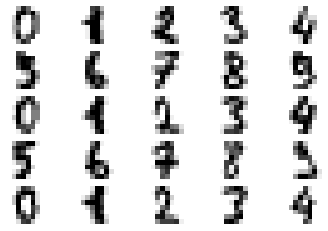

In [4]:
def show_digits():
    digits=datasets.load_digits()
    fig=plt.figure()
    print("Vector from images 0:\n",digits.data[0])
    for i in range(25):
        ax=fig.add_subplot(5,5,i+1)
        ax.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.axis('off')
    plt.show()
    
show_digits()

Use <b>load_data</b> to obtain training and testing data.

In [5]:
def load_data():
    digits = datasets.load_digits()
    return model_selection.train_test_split(digits.data, digits.target,
                                             test_size=0.25, random_state=0, stratify=digits.target)

## Problem 1.1

Return the mean accuracy on the X_train and y_train, and X_test and y_test for different assumptions in a DataFrame.

| | Bernoulli Naive Bayes | Multinomial Naive Bayes | Gaussian Naive Bayes|
|:----: | :----:| :----: | :----: |
| Training Score |  |  |  |
| Testing Score |  |  |  |

Hints: sklearn.naive_bayes.BernoulliNB/MultinomialNB/GaussianNB.score

In [44]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

def myfunction_1():
    X_train, X_test, y_train, y_test = load_data()
    # YOUR CODE HERE
    b=BernoulliNB().fit(X_train,y_train)
    b1=b.score(X_train,y_train)
    b2=b.score(X_test,y_test)
    
    m=MultinomialNB().fit(X_train,y_train)
    m1=m.score(X_train,y_train)
    m2=b.score(X_test,y_test)
    
    g=GaussianNB().fit(X_train,y_train)
    g1=g.score(X_train,y_train)
    g2=g.score(X_test,y_test)
    
    data={'Bernoulli Naive Bayes':{'Training Score':b1,'Testing Score':b2}, 
          'Multinomial Naive Bayes':{'Training Score':m1,'Testing Score':m2}, 
          'Gaussian Naive Bayes':{'Training Score':g1,'Testing Score':g2}}
    df=pd.DataFrame(data)
                    
    return df

In [45]:
myfunction_1()

,Bernoulli Naive Bayes,Multinomial Naive Bayes,Gaussian Naive Bayes
Training Score,0.865627,0.905716,0.847810
Testing Score,0.866667,0.866667,0.835556


## Problem 1.2

Plot the mean accuracy on the X_train and y_train, and X_test and y_test in the same figure for Multinomial assumption with different $\alpha$.

![](fig_1_2.jpg)

In [98]:
def myfunction_2():
    X_train, X_test, y_train, y_test = load_data()
    # YOUR CODE HERE
    m3=[]
    m4=[]
    a=np.logspace(-2,5)
    for i in np.logspace(-2,5):
        m=MultinomialNB(alpha=i).fit(X_train,y_train)
        m1=m.score(X_train,y_train)
        m2=m.score(X_test,y_test)
        m3.append(m1)
        m4.append(m2)
    
    x1=np.array(m3)
    x2=np.array(m4)
    
    plt.plot(a,x1,color='blue',alpha=0.6,label='Training Score')
    plt.plot(a,x2,color='orange',alpha=0.6,label='Testing Score')
    plt.ylim(0.0,1.0)
    plt.hlines(0.9,0.01,100000,'g',alpha=0.6,label="Score=0.9",linestyles='--')
    plt.xscale('log')
    plt.xlabel('a')
    plt.ylabel('score')
    plt.title('MultinomialNB')
    plt.legend()
    
    plt.show()

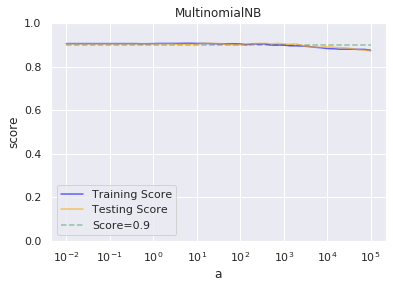

In [99]:
myfunction_2()

## Problem 1.3

Plot the mean accuracy on the X_train and y_train, and X_test and y_test in the same figure for Bernoulli assumption with different $\alpha$.

![](fig_1_3.jpg)

In [104]:
def myfunction_3():
    X_train, X_test, y_train, y_test = load_data()
    # YOUR CODE HERE
    b3=[]
    b4=[]
    a=np.logspace(-2,5)
    for i in np.logspace(-2,5):
        b=BernoulliNB(alpha=i).fit(X_train,y_train)
        b1=b.score(X_train,y_train)
        b2=b.score(X_test,y_test)
        b3.append(b1)
        b4.append(b2)
    
    x1=np.array(b3)
    x2=np.array(b4)
    
    plt.plot(a,x1,color='blue',alpha=0.6,label='Training Score')
    plt.plot(a,x2,color='orange',alpha=0.6,label='Testing Score')
    plt.ylim(0.0,1.0)
    plt.hlines(0.9,0.01,100000,'g',alpha=0.6,label="Score=0.9",linestyles='--')
    plt.xscale('log')
    plt.xlabel('a')
    plt.ylabel('score')
    plt.title('BernoulliNB')
    plt.legend()
    
    plt.show()

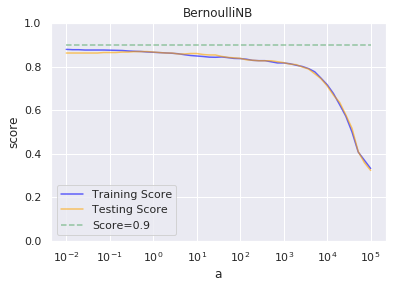

In [105]:
myfunction_3()

Write your analysis and conclusions for this example:

YOUR ANSWER HERE

As the value of alpha varies, the fit produces different results; when alpha gets smaller, the mean accuracy generally gets higher; test data generally fits well with training data; multinomial naive bayes might be the most accurate way because it has the highest number of mean accuracy (in the data frame, compared to the rest) and the graph provides the same result as well.